# Python Portfolio

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=[12,8]

# Data

df = pd.read_csv(r'C:\Users\derri\Desktop\movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Checking if Dataset has missing Data
for col in df.columns:
    
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [17]:
# Filling in [NA] missing data 

df['budget'] = df['budget'].fillna(df['budget'].mode()[0])

df['gross'] = df['gross'].fillna(df['gross'].mode()[0])

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [5]:
# Finding each column's Dtypes

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
# Converting Dtypes

#df['budget'] = df.budget.astype('Int64')
#df['gross'] = df.gross.astype('Int64')

df['budget'] = df.budget.astype(dtype=('int64'))
df['gross'] = df.gross.astype(dtype=('int64'))

# Can't turn them into 'int64' because they have <NA> values - Solution: Turn '<NA>' values in numerical values

In [18]:
# renaming columns

df.rename(columns={'released':'date_released', 'year':'year_released'}) # ,inplace = True)

,name,rating,genre,year_released,date_released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,14000000,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20000000,14000000,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,14000000,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,14000000,NaN,120.0


In [71]:
# dropping (deleting) columns

df.drop(columns={'Year_Corrected'}, inplace=True)

In [19]:
# Sorting by Descending 'Gross'


pd.set_option('display.max_rows', 15)
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20000000,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,20000000,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20000000,682,Roxwell Films,93.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


In [73]:
pd.set_option('display.max_rows', None)

In [21]:
# Dropping Duplicated columns

pd.set_option('display.max_rows', 20)
df['company'].drop_duplicates().sort_values(ascending=False) # To drop any duplicates: df.drop_duplicates()

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

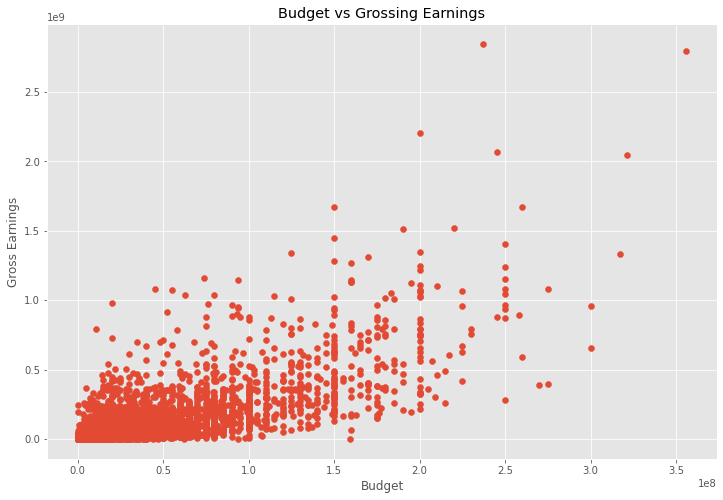

In [13]:
# Comparisons: Creating Scatter Plot - Gross vs Budget

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Grossing Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')

plt.show()

In [14]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0


<AxesSubplot:xlabel='budget', ylabel='gross'>

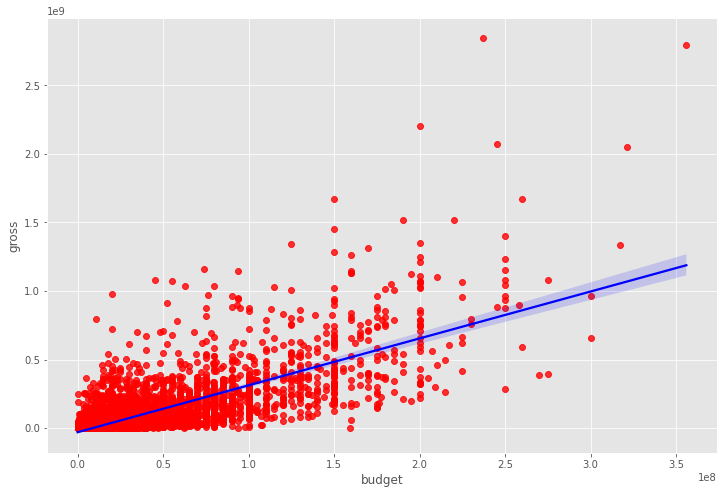

In [14]:
#Comparisons: Creating Plot - Budget vs Gross

sns.regplot(x='budget',y='gross',data=df, 
            scatter_kws={'color':'red'}, 
            line_kws={'color':'blue'})

In [16]:
df.corr(method='pearson') # pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


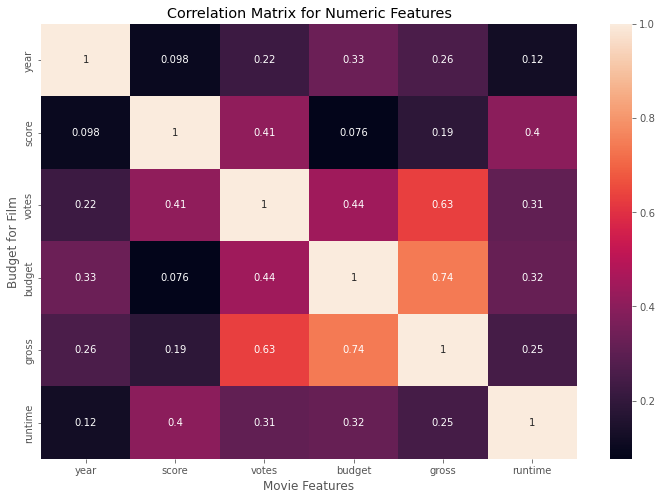

In [17]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Budget for Film')

plt.show()

In [18]:
#Company Column

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0


In [19]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype== 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344.0,1777,98.0


In [20]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344.0,1777,98.0


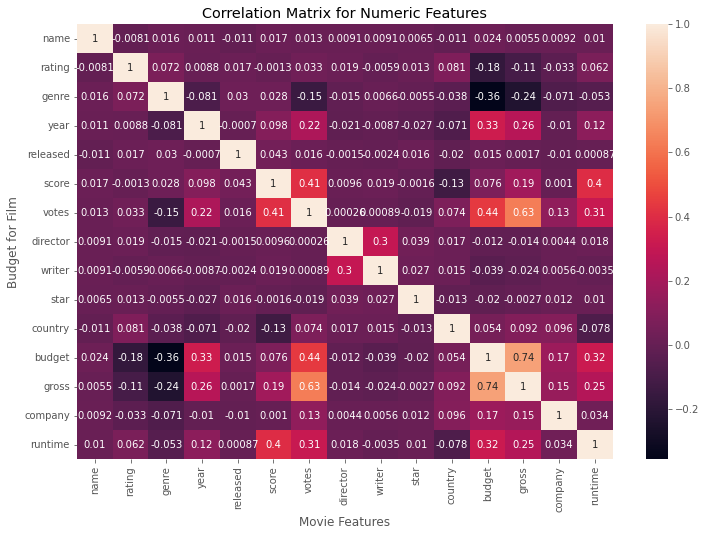

In [21]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Budget for Film')

plt.show()

In [22]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.320447
         gross       0.245216
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [23]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget   genre     -0.356564
genre    budget    -0.356564
         gross     -0.235650
gross    genre     -0.235650
rating   budget    -0.176002
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [24]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64